<a href="https://colab.research.google.com/github/Nchekwube2021/Group-Project/blob/main/ship_routing_descriptive_stat_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Statistics to summarize features of data on ship routing

In [1]:
# We want to have a sense of how the middle variables would look like, therefore we would measure
# Mean, Median and Standard deviation of the entire distribution and that of a single vessel

In [2]:
%matplotlib inline 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
ship_track = pd.read_csv('/content/drive/MyDrive/ShipRouting/cropped500.csv', parse_dates=["BaseDateTime"]) # Entire distribution

In [5]:
ship_rout = pd.read_csv('/content/drive/MyDrive/ShipRouting/IMO1002225.csv', parse_dates=["BaseDateTime"]) # Single vessel

In [6]:
ship_track.head()

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,394,366934890,2020-06-01 00:00:11,41.18841,-72.21798,12.4,-187.2,223.0,JOHN H,IMO8991126,WAC6768,60.0,0.0,70.0,11.0,NaN,NaN,B
1,521,368011970,2020-06-01 00:00:16,40.97143,-73.50035,9.8,-164.4,245.0,TECLUTSA,IMO8971035,WDJ7982,31.0,0.0,27.0,8.0,3.0,NaN,A
2,533,367179990,2020-06-01 00:00:03,41.16930,-73.17449,1.1,111.6,511.0,MARJORIE B MCALLISTE,IMO7391020,WDD6957,31.0,0.0,32.0,9.0,3.9,52.0,B
3,639,367179990,2020-06-01 00:00:03,41.16930,-73.17449,1.1,111.6,511.0,MARJORIE B MCALLISTE,IMO7391020,WDD6957,31.0,0.0,32.0,9.0,3.9,52.0,B
4,795,367008090,2020-06-01 00:00:13,40.46659,-73.86444,1.2,128.9,224.0,NEW YORK,IMO7437068,WZH4694,90.0,0.0,49.0,10.0,3.8,NaN,B


In [7]:
ship_track.tail()

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
30539,8830288,636019574,2020-06-01 23:54:49,38.69152,-74.95030,10.9,142.0,145.0,CALYPSO,IMO9550371,D5VD2,74.0,0.0,172.0,28.0,6.2,74.0,B
30540,8830365,366998170,2020-06-01 23:55:01,39.15016,-74.51330,7.7,-187.1,227.0,PEARL COAST,IMO7806477,WDJ2403,31.0,0.0,41.0,12.0,5.6,NaN,B
30541,8830666,636019574,2020-06-01 23:57:00,38.68625,-74.94498,10.9,140.0,142.0,CALYPSO,IMO9550371,D5VD2,74.0,0.0,172.0,28.0,6.2,74.0,B
30542,8830933,366914180,2020-06-01 23:59:57,38.81267,-75.11622,11.7,8.8,1.0,CAPE HENLOPEN,IMO7923433,WYR8756,60.0,0.0,86.0,20.0,NaN,NaN,B
30543,8830936,366998170,2020-06-01 23:59:50,39.14243,-74.52230,7.8,-186.4,227.0,PEARL COAST,IMO7806477,WDJ2403,31.0,0.0,41.0,12.0,5.6,NaN,B


In [8]:
# Shape of column and rows of single vessel
ship_track.shape

(30544, 18)

In [9]:
# Maximum and Minimum values of SOG for the entire distribution
max(ship_track["SOG"])

20.2

In [10]:
min(ship_track["SOG"])

0.6

In [11]:
# Mean of SOG for the entire distribution
ship_track["SOG"].mean() 

8.58801401257196

In [12]:
# Median of SOG for the entire distribution
ship_track["SOG"].median()

8.8

In [13]:
# Standard deviation of SOG for the entire distribution
ship_track["SOG"].std()

3.8463428009912644

In [14]:
# Unique values of SOG for the entire distribution
SOG = ship_track.SOG 
SOG.value_counts()

8.8     628
8.9     509
8.6     504
8.7     497
8.0     473
       ... 
19.0      1
19.5      1
19.3      1
19.1      1
20.2      1
Name: SOG, Length: 195, dtype: int64

## Graphical Visualization of the entire distribution

In [15]:
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import pie, axis, show
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

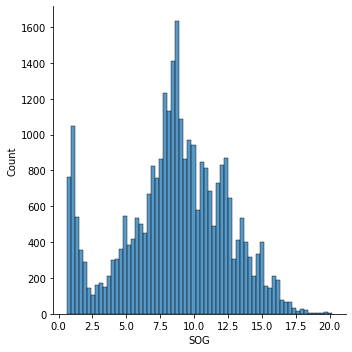

In [16]:
# Histogram helps us to have a better graphical view of the shape, spread & continuous sample of our distribution
sns.displot(ship_track["SOG"])

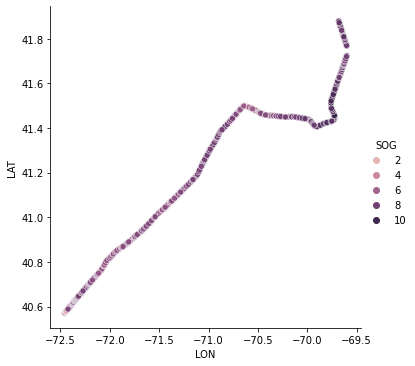

In [17]:
# We check for path of a single vessel using scatter plot
sns.relplot(x="LON", y="LAT", hue="SOG", data=ship_rout)

No handles with labels found to put in legend.


([<matplotlib.patches.Wedge at 0x7eff6c0b9a50>,
 [Text(0.6029529338820736, -0.920025955896354, 'Cargo'),
  Text(1.05030991628838, -0.3268777749347554, 'Fishing'),
  Text(1.0583802311311463, 0.29971867868182916, 'Passenger'),
  Text(0.7131717825621003, 0.8374879154693496, 'Pleasure Craft/Sailing'),
  Text(0.1672340124560385, 1.0872133116724858, 'Tanker'),
  Text(-1.0892686810840055, -0.15327667927480365, 'Tug Tow')],
 [Text(0.32888341848113106, -0.5018323395798294, '18.5%'),
  Text(0.5728963179754799, -0.1782969681462302, '3.5%'),
  Text(0.5772983078897161, 0.16348291564463407, '14.9%'),
  Text(0.3890027904884183, 0.4568115902560088, '3.8%'),
  Text(0.09121855224874827, 0.5930254427304468, '13.8%'),
  Text(-0.5941465533185485, -0.08360546142262017, '45.6%')])

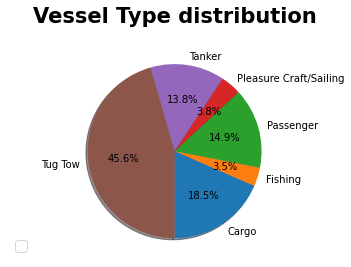

In [18]:
# We check for Vessel Types in our entire distribution using pie chart

passengerNo1 = list(range(60,70))
passengerNo2  = list(range(1012,1016))
cargoNo =list(range(70,80))
tankerNo = list(range(80,90))
vesselTypesDescription = [[[0],'Not Available'],
                          [[21,22,31,32,52,1023,1025],'Tug Tow'],
                          [[30,1001,1002],'Fishing'],
                          [[35,1021], 'Military'], 
                          [[36,37,1019],'Pleasure Craft/Sailing'],
                          [passengerNo1 + passengerNo2,'Passenger'], 
                          [cargoNo + [1003,1004,1016],'Cargo'],    
                          [tankerNo +[1017, 1024],'Tanker']] 
vesselTypeCount = np.zeros((0,2))
for elem in ship_track.VesselType:
   for vesselType in vesselTypesDescription:
     for number in vesselType[0]:
        if elem == number:
          vesselTypeCount =np.append(vesselTypeCount, vesselType[1])
unique, counts = np.unique(vesselTypeCount, return_counts=True)
countTypes = [unique, counts]
plt.legend(loc=3, fontsize=15)
plt.title('Vessel Type distribution', fontweight = "bold", fontsize = 21, pad = 20)
plt.axis('equal')
plt.pie(countTypes[1], labels = countTypes[0], shadow=True, startangle=270, autopct='%1.1f%%')

No handles with labels found to put in legend.


([<matplotlib.patches.Wedge at 0x7eff6c119710>,
 [Text(0.7498432402820295, 0.8048199270665126, 'East'),
  Text(-0.9528729729771174, 0.5495753791517137, 'North'),
  Text(0.013538734814413502, -1.099916679871537, 'Northeast'),
  Text(0.9752471266789262, -0.508815331829239, 'South'),
  Text(1.069821358635262, 0.2558950187240896, 'Southeast'),
  Text(0.964774076482168, 0.5284041836965148, 'Southwest')],
 [Text(0.4090054037901979, 0.43899268749082504, '9.5%'),
  Text(-0.5197488943511549, 0.2997683886282075, '47.8%'),
  Text(0.0073847644442255455, -0.599954552657202, '19.3%'),
  Text(0.5319529781885052, -0.2775356355432212, '15.0%'),
  Text(0.5835389228919611, 0.13957910112223068, '7.8%'),
  Text(0.5262404053539097, 0.2882204638344626, '0.7%')])

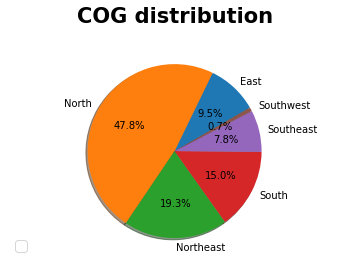

In [19]:
# We check for COG in our entire distribution using pie chart

cardinalDirection= [[22.5, 'North'], 
                    [67.5, 'Northeast'], 
                    [112.5, 'East'], 
                    [157.5,'Southeast'], 
                    [202.5, 'South'], 
                    [247.5,'Southwest'], 
                    [292.5, 'West'],
                    [337.5, 'Northwest'],
                    [360, 'North']]
labelsCardinalDir = ('North', 'Northeast', 'East', 'Southeast','South', 'Southwest', 'West', 'Northwest')
results =  np.zeros((0, 1))
cog = ship_track['COG']
for value in cog:
  cardinalDirFound = False
  for carDir in cardinalDirection:
    if not cardinalDirFound:
      if value < carDir[0]:
        results = np.append(results, carDir[1])
        cardinalDirFound = True
unique, counts = np.unique(results, return_counts=True)
countCardinals = [unique, counts]
plt.legend(loc=3, fontsize=15)
plt.title('COG distribution', fontweight = "bold", fontsize = 21, pad = 20)
plt.axis('equal')
plt.pie(countCardinals[1],  labels = countCardinals[0], shadow=True, startangle=30, autopct='%1.1f%%')

No handles with labels found to put in legend.


([<matplotlib.patches.Wedge at 0x7eff6bfa6850>,
 [Text(0.7308807483362139, 0.8220786651601514, 'High'),
  Text(-1.014569862440063, -0.42502705117245415, 'Medium'),
  Text(1.0968033800622086, 0.08379943606083759, 'Slow')],
 [Text(0.3986622263652075, 0.44840654463280977, '10.2%'),
  Text(-0.5534017431491252, -0.23183293700315677, '75.6%'),
  Text(0.598256389124841, 0.0457087833059114, '14.2%')])

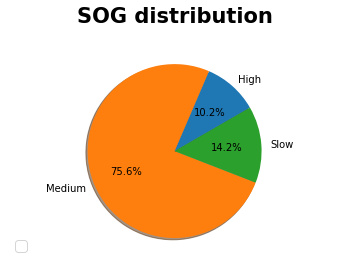

In [20]:
# We check for SOG in our entire distribution using pie chart

slow = list(range(0,3))
medium  = list(range(3,14))
high = list(range(14,23))
very_high = list(range(23,99))
exception = list(range(99, 150))
sogDescription = [[slow, 'Slow'],
                  [medium, 'Medium'],
                  [high, 'High'],
                  [very_high, 'Very High'], 
                  [exception, 'Exception']]
sogCount = np.zeros((0,2))
for elem in ship_track.SOG:
   for SOG in sogDescription:
     for number in SOG[0]:
       if elem == number:
         sogCount =np.append(sogCount, SOG[1])
unique, counts = np.unique(sogCount, return_counts=True)
countTypes = [unique, counts]
plt.legend(loc=3, fontsize=15)
plt.title('SOG distribution', fontweight = "bold", fontsize = 21, pad = 20)
plt.axis('equal')
plt.pie(countTypes[1], labels = countTypes[0], shadow=True, startangle=30, autopct='%1.1f%%')

# We also took a look at the COG and SOG of a single vessel

No handles with labels found to put in legend.


([<matplotlib.patches.Wedge at 0x7eff6bf8c510>,
 [Text(0.7885731767397136, -0.7669109106843093, 'East'),
  Text(1.0685975360103284, 0.26095843736628854, 'North'),
  Text(-0.8963564632458945, 0.6376088854441346, 'Northeast'),
  Text(-0.06429932546862949, -1.098119117739182, 'Southeast')],
 [Text(0.43013082367620736, -0.4183150421914414, '25.4%'),
  Text(0.5828713832783609, 0.14234096583615738, '6.7%'),
  Text(-0.4889217072250333, 0.34778666478770975, '66.0%'),
  Text(-0.035072359346525174, -0.5989740642213719, '1.9%')])

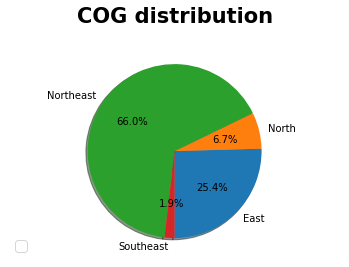

In [21]:
# We check for COG of a single vessel using pie chart

cardinalDirection= [[22.5, 'North'],
                    [67.5, 'Northeast'], 
                    [112.5, 'East'], 
                    [157.5,'Southeast'], 
                    [202.5, 'South'], 
                    [247.5,'Southwest'],
                    [292.5, 'West'],
                    [337.5, 'Northwest'],
                    [360, 'North']]
labelsCardinalDir = ('North', 'Northeast', 'East', 'Southeast','South', 'Southwest', 'West', 'Northwest')
results =  np.zeros((0, 1))
cog = ship_rout['COG']
for value in cog:
  cardinalDirFound = False
  for carDir in cardinalDirection:
    if not cardinalDirFound:
      if value < carDir[0]:
        results = np.append(results, carDir[1])
        cardinalDirFound = True
unique, counts = np.unique(results, return_counts=True)
countCardinals = [unique, counts]
plt.legend(loc=3, fontsize=15)
plt.title('COG distribution', fontweight = "bold", fontsize = 21, pad = 20)
plt.axis('equal')
plt.pie(countCardinals[1],  labels = countCardinals[0], shadow=True, startangle=270, autopct='%1.1f%%')

In [22]:
# Max value of SOG for a single vessel
max(ship_rout["SOG"])


10.7

In [23]:
# Min Value of SOG for a single vessel
min(ship_rout["SOG"])

0.8

No handles with labels found to put in legend.


([<matplotlib.patches.Wedge at 0x7eff6bd99810>],
 [Text(1.1, -2.6942229581241775e-16, 'Medium')],
 [Text(0.6, -1.4695761589768238e-16, '100.0%')])

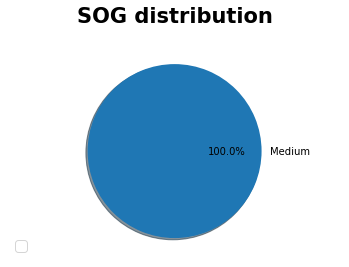

In [27]:
# We check for SOG of single vessel using pie chart

slow = list(range(0,3))
medium  = list(range(3,14))
sogsvDescription = [[slow, 'Slow'],
                  [medium, 'Medium']]
sogsvCount = np.zeros((0,2))
for elem in ship_rout.SOG:
  for SOG in sogsvDescription:
    for number in SOG[0]:
      if elem == number:
        sogsvCount =np.append(sogsvCount, SOG[1])
unique, counts = np.unique(sogsvCount, return_counts=True)
countTypes = [unique, counts]
plt.legend(loc=3, fontsize=15)
plt.title('SOG distribution', fontweight = "bold", fontsize = 21, pad = 20)
plt.axis('equal')
plt.pie(countTypes[1], labels = countTypes[0], shadow=True, startangle=180, autopct='%1.1f%%')

In [28]:
# We check for the unique values of the single vessel that pie chart was plotted above
SOG = ship_rout.SOG
SOG.value_counts()

7.3     73
7.1     68
7.9     64
8.0     61
7.8     61
7.4     58
7.7     58
7.0     58
7.2     56
6.9     52
8.1     50
7.6     49
7.5     46
6.8     34
8.2     31
6.7     24
8.8     20
8.3     20
8.6     18
9.0     18
9.2     17
8.4     17
8.9     15
6.6     15
8.7     13
6.5     11
9.1     10
9.3     10
8.5      9
9.6      9
6.4      8
5.8      8
6.3      8
9.5      8
9.7      7
6.2      7
9.8      5
9.4      4
6.0      3
10.3     3
9.9      3
5.9      3
10.0     2
10.4     2
5.7      1
10.5     1
1.3      1
0.8      1
10.2     1
10.7     1
6.1      1
2.3      1
4.5      1
2.6      1
5.0      1
3.8      1
Name: SOG, dtype: int64

[[6016 538070946 Timestamp('2020-06-01 00:00:32') ... nan nan 'B']
 [8683 538070946 Timestamp('2020-06-01 00:01:42') ... nan nan 'B']
 [21716 538070946 Timestamp('2020-06-01 00:04:01') ... nan nan 'B']
 ...
 [8696421 538070946 Timestamp('2020-06-01 21:07:41') ... nan nan 'B']
 [8702623 538070946 Timestamp('2020-06-01 21:12:22') ... nan nan 'B']
 [8758765 538070946 Timestamp('2020-06-01 22:25:22') ... nan nan 'B']]


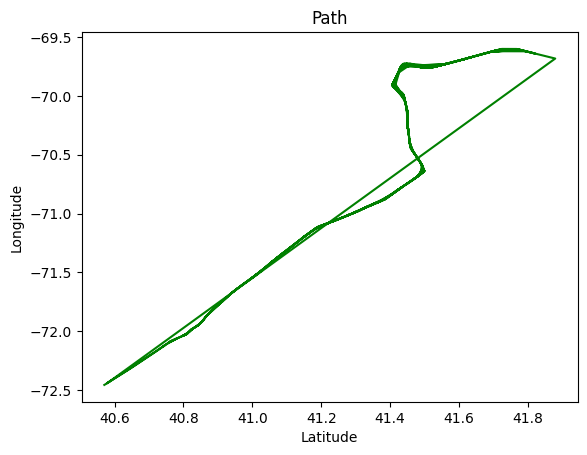

[40.57029, 40.57184, 40.57483, 40.57331, 40.5764, 40.57807, 40.5775, 40.57871, 40.57861, 40.58006, 40.579, 40.58148, 40.58445, 40.58295, 40.58584000000001, 40.59019, 40.59165, 40.59459, 40.59312, 40.58733, 40.5961, 40.59758, 40.59879, 40.60262, 40.60559, 40.60708, 40.60411, 40.59984, 40.60113, 40.60858, 40.61029, 40.61174000000001, 40.61349000000001, 40.61494, 40.6167, 40.6182, 40.62115, 40.6227, 40.6197, 40.6242, 40.6257, 40.62698, 40.62847, 40.62996, 40.63147, 40.63293, 40.63448, 40.63594000000001, 40.63915, 40.63745, 40.63936, 40.64231, 40.64079, 40.648, 40.64526, 40.64943, 40.65091, 40.65384, 40.6553, 40.65238, 40.65677, 40.65971, 40.65826, 40.66403, 40.66565, 40.66858, 40.67299000000001, 40.67444, 40.67154, 40.67871, 40.67583, 40.67728, 40.68137, 40.68263, 40.68406, 40.67999, 40.68832, 40.68975, 40.69253, 40.69394000000001, 40.68549, 40.69115, 40.6869, 40.69661, 40.70062, 40.69791, 40.69523, 40.69931, 40.71012, 40.70201, 40.7132, 40.71599000000001, 40.70331, 40.70605, 40.71162, 40

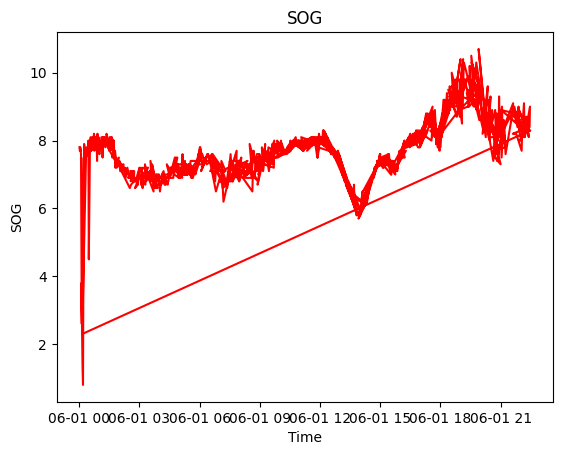

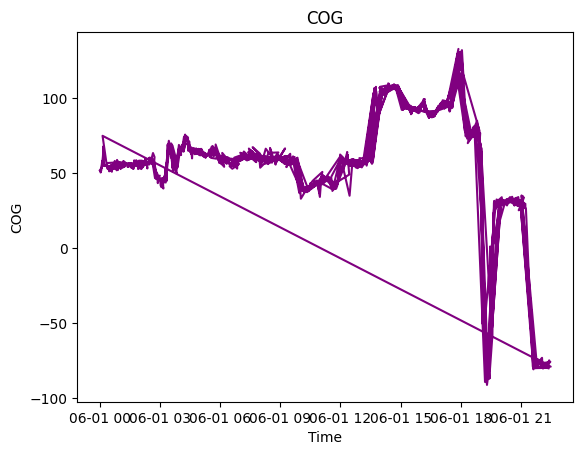

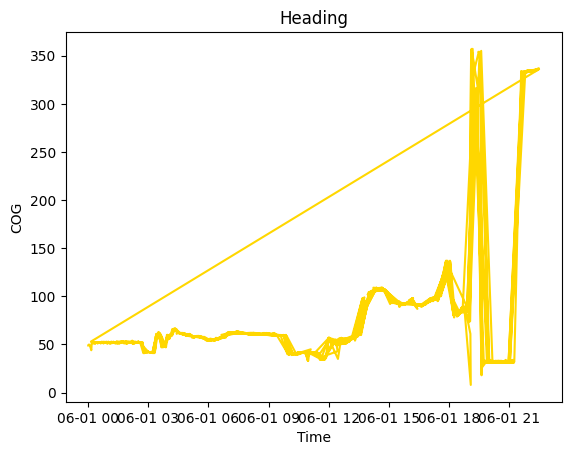

In [30]:
# We check for Path, SOG, COG, and Heading of single vessel
g = ship_rout.to_numpy()
gt = []
gx = []
gy = []
gsog = []
gcog = []
gheading = []
print(g)
for i in range(0, g.shape[0]-1):
  gt.append(g[i][2])
  gx.append(g[i][3])
  gy.append(g[i][4])
  gsog.append(g[i][5])
  gcog.append(g[i][6])
  gheading.append(g[i][7])

plt.style.use("default")
plt.title("Path")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.plot(gx, gy, color="green")
plt.show()
print(gx)

plt.title("SOG")
plt.xlabel("Time")
plt.ylabel("SOG")
plt.plot(gt, gsog, color="red")
plt.show()

plt.title("COG")
plt.xlabel("Time")
plt.ylabel("COG")
plt.plot(gt, gcog, color="purple")
plt.show()

plt.title("Heading")
plt.xlabel("Time")
plt.ylabel("COG")
plt.plot(gt, gheading, color="gold")
plt.show()

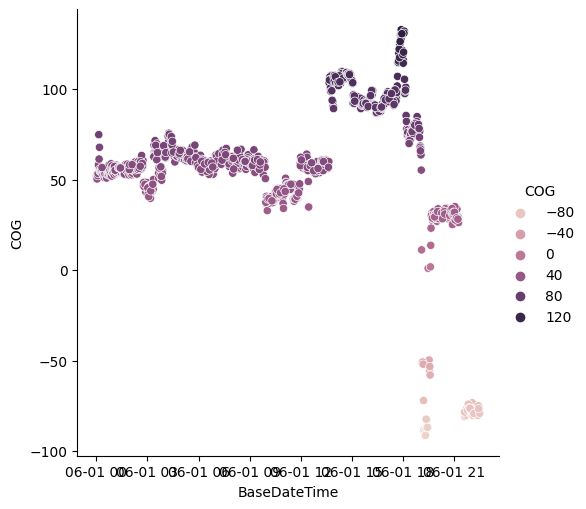

In [35]:
# COG of single vessel
sns.relplot(x="BaseDateTime", y="COG", hue="COG", data=ship_rout)

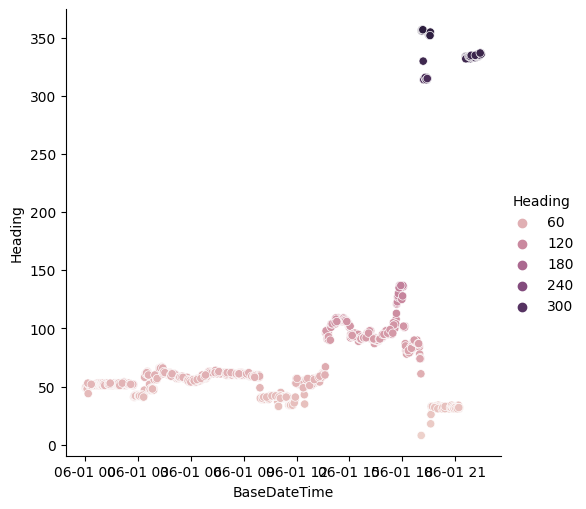

In [36]:
# We check for the Heading of a single vessel
sns.relplot(x="BaseDateTime", y="Heading", hue="Heading", data=ship_rout)